In [20]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from omegaconf import OmegaConf
from os.path import join, isdir
from os import listdir
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
files = [
    ("../experiments/training/test_optimizer_result/sweeps/sweep_optimization/sweep_optimization_1",1),
    ("../experiments/training/test_optimizer_result/sweeps/sweep_optimization/sweep_optimization_2",2),
    ("../experiments/training/test_optimizer_result/sweeps/sweep_optimization/sweep_optimization_3",3),
    ("../experiments/training/test_optimizer_result/sweeps/sweep_optimization/sweep_optimization_4",4),
    ("../experiments/training/test_optimizer_result/sweeps/sweep_optimization/sweep_optimization_5",5),
]
to_result_path = "logs/csv/version_0/metrics.csv"

df = pd.DataFrame()
for file in files:
    df_temp_opt = pd.DataFrame()
    for kfold in listdir(file[0]):
        if isdir(join(file[0], kfold)):
            
            filepath = join(file[0], kfold, to_result_path)
            df_temp_kfold = pd.read_csv(filepath).ffill().drop_duplicates(subset="epoch")
            df_temp_kfold["kfold"] = kfold

            if df_temp_opt.empty:
                df_temp_opt = df_temp_kfold
            else:
                df_temp_opt = pd.concat([df_temp_opt, df_temp_kfold], ignore_index=True)
    
    
    df_temp_opt["optimizer"] = file[1]
    
    if df.empty:
        df = df_temp_opt
    else:
        df = pd.concat([df, df_temp_opt], ignore_index=True)

df

,encoder_position_row_drift_active,encoder_position_row_drift_inactive,encoder_position_row_drift_miss_val,encoder_position_whole_drift,encoder_variable_row_drift_active,encoder_variable_row_drift_inactive,encoder_variable_row_drift_miss_val,encoder_variable_whole_drift,epoch,final_ff_whole_drift,...,grad_norm/model.encoder.norm_layer.norm.bias,grad_norm/model.encoder.norm_layer.norm.weight,grad_norm/model.forecaster.bias,grad_norm/model.forecaster.weight,step,test_loss,train_loss,val_loss,kfold,optimizer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,3,NaN,NaN,5.767532,k_0,1
1,1.013973e-07,NaN,1.194853e-07,1.013973e-07,1.524350e-09,NaN,1.286608,1.524350e-09,1,0.331297,...,9.956540e-11,2.644378e-11,0.385315,1.853522,7,NaN,1.237050,3.326493,k_0,1
2,1.283503e-07,NaN,1.510963e-07,1.283503e-07,2.537575e-09,NaN,1.286608,2.537575e-09,2,0.444345,...,6.623302e-11,1.271194e-11,0.196875,4.603484,11,NaN,0.386871,1.029027,k_0,1
3,2.489799e-07,NaN,2.931185e-07,2.489799e-07,4.406551e-09,NaN,1.286608,4.406551e-09,3,0.514080,...,4.230947e-12,1.235172e-12,0.043606,1.727041,15,NaN,0.058671,0.305137,k_0,1
4,2.905797e-07,NaN,3.421165e-07,2.905797e-07,4.898901e-09,NaN,1.286608,4.898901e-09,4,0.562770,...,6.055398e-12,1.093013e-12,0.035250,1.127612,19,NaN,0.183621,0.021698,k_0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25020,5.908929e-04,0.0,7.023854e-04,5.763110e-04,3.327183e-05,NaN,1.293211,3.327183e-05,996,0.958247,...,6.927290e-14,1.786438e-14,0.046006,0.004036,3987,NaN,0.000976,0.006283,k_4,5
25021,5.908929e-04,0.0,7.023854e-04,5.763110e-04,3.327183e-05,NaN,1.293211,3.327183e-05,997,0.950102,...,4.810061e-14,9.931034e-15,0.046284,0.004753,3991,NaN,0.000971,0.006202,k_4,5
25022,5.908929e-04,0.0,7.023854e-04,5.763110e-04,3.327183e-05,NaN,1.293211,3.327183e-05,998,0.952777,...,5.016470e-14,1.613680e-14,0.046000,0.003636,3995,NaN,0.000969,0.006425,k_4,5
25023,5.908929e-04,0.0,7.023854e-04,5.763111e-04,3.327183e-05,NaN,1.293211,3.327183e-05,999,0.950992,...,5.388040e-14,1.365772e-14,0.045978,0.003441,3999,NaN,0.000971,0.006201,k_4,5


<Axes: xlabel='epoch', ylabel='encoder_position_row_drift_active'>

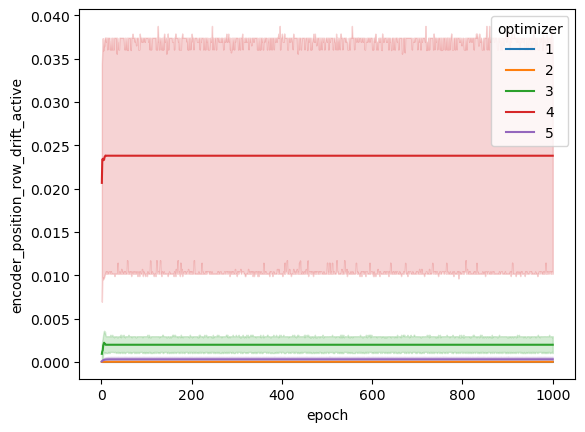

In [37]:
col = 'encoder_position_row_drift_active'
sns.lineplot(data=df, x="epoch", y=col, hue="optimizer", palette="tab10")

<Axes: xlabel='epoch', ylabel='encoder_variable_row_drift_active'>

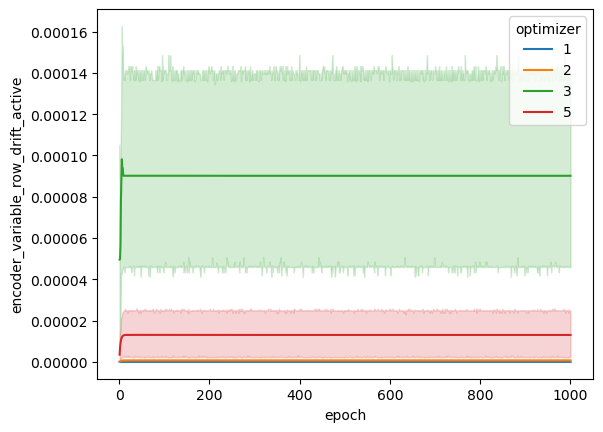

In [35]:
col = 'encoder_variable_row_drift_active'
sns.lineplot(data=df, x="epoch", y=col, hue="optimizer", palette="tab10")

<Axes: xlabel='epoch', ylabel='final_ff_whole_drift'>

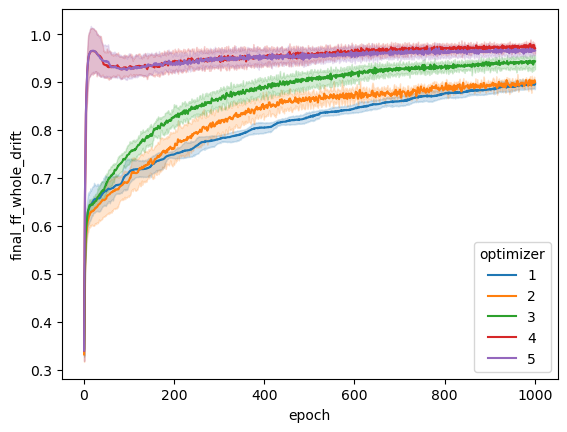

In [32]:
col = 'final_ff_whole_drift'
sns.lineplot(data=df, x="epoch", y=col, hue="optimizer", palette="tab10")